    Year                           Country  numPosts
0   2013  Democratic Republic of the Congo      1399
1   2013                     United States      1193
2   2014                     United States       986
3   2012                     United States       859
4   2015                     United States       803
5   2014  Democratic Republic of the Congo       762
6   2016                     United States       715
7   2015  Democratic Republic of the Congo       691
8   2011                     United States       687
9   2012  Democratic Republic of the Congo       641
10  2012                             India       498
11  2013                           Nigeria       442
12  2013                             India       407
13  2016                           Nigeria       381
14  2014                             India       340


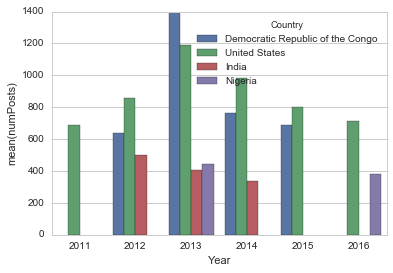

In [66]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

df1 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_1.csv")
df2 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_2.csv")
df3 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_3.csv")
df4 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_4.csv")
df5 = pd.read_csv("//Users//dineshmurali//Documents//wpcommunitydata//wpCommunity_5.csv")

frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)

df['Date'] = np.where(df['Date'] == "Today", date.today().strftime("%B %d, %Y"), df['Date'])
df['Date'] = np.where(df['Date'] == "Yesterday", 
                      (date.today() - timedelta(1)).strftime("%B %d, %Y"), 
                      df['Date'])
df['Date'] = df['Date'].fillna(value = "January 01, 1900")
df['Date'] = np.where(df.Date.str[-4:].str.isnumeric(), 
                      df['Date'], 
                      df['Date'] + ', ' + str(datetime.datetime.today().year))
df['Country'] = df['Country'].fillna(value = 'Unknown')
df['Date'] = pd.to_datetime(df.Date, format = "%B %d, %Y")
df['YrMo'] = pd.DatetimeIndex(df.Date).strftime("%B%Y")
df['Year'] = pd.DatetimeIndex(df.Date).year

#posts trend, esp from US
#plot top 10 contributors
#countries posts vs encouragement and love
#encouragements by time and language

#print(df1.shape)
#df[df['UserName'] == 'Diane DeVillers']
#print(df.groupby('Year').size().sort_values(ascending = False))
#print(df.groupby(['Year','Country']).size().sort_values(ascending = False))
#print(df.groupby('UserName').size().sort_values(ascending = False))
#print(df.groupby('UserName').sum().sort_values(by='Loves',ascending = False))
#print(df.groupby('UserName').sum().sort_values(by='Encourages',ascending = False))
#print(df.groupby('Country').sum().sort_values(by='Loves',ascending = False))
#print(df.groupby('Country').sum().sort_values(by='Encourages',ascending = False))
#df[df.Year > 1900].groupby('Year').size().plot(title = "Posts By Year",
#                                               legend = False)

#df.groupby('Country').size().sort_values(ascending = False)[:10].plot(
#    title = "Posts By Country", legend = False, kind = "pie")

#df[(df.Country == "United States") & (df.Year > 1900)].groupby('UserName').size().sort_values(ascending = False)[:10].plot(title = "Posts By User For US", legend = False, kind = "bar")

#df[(df.UserName == "Diane DeVillers")].groupby('Year').size().plot(
#    title = "Posts By Diane", legend = False)

#df[(df.UserName == "Diane DeVillers") & (df.Year > 1900)].groupby("Year").size()
byYearCountry = pd.DataFrame(df[df.Year > 1900].groupby(['Year','Country']).size().sort_values(ascending = False)[:15], 
                            columns = ['numPosts'])
byYearCountry = byYearCountry.reset_index(level = ['Year','Country'])
print(byYearCountry)
sns.barplot(x="Year", y="numPosts", hue="Country", data = byYearCountry)
